# 1.データのダウンロード
### 1.1.ライブラリのインポート

In [48]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn import tree

### 1.2.データセットのダウンロード

In [49]:
#データセットをダウンロード
df_data = pd.read_csv('./input.csv')
#インデックスをhorse_idとする
df_data = df_data.set_index(["horse_id"])

In [50]:
df_data

,2試合前,3試合前,4試合前,5試合前,6試合前,7試合前,8試合前,9試合前,10試合前,11試合前,target
horse_id,,,,,,,,,,,
1988105984,0.600000,0.333333,0.066667,0.538462,0.083333,0.071429,0.8125,0.363636,0.214286,0.083333,0.0
1991103531,0.461538,0.666667,0.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1991190011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1992100038,0.555556,0.636364,0.375000,0.333333,0.833333,0.722222,0.6875,0.866667,0.800000,0.545455,0.0
1992101546,0.285714,0.250000,0.250000,0.750000,0.333333,0.625000,0.7000,0.857143,1.000000,0.846154,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2020110112,0.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020110119,0.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2020110133,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [51]:
#欠損値確認
df_data.isnull().sum()

2試合前       4159
3試合前       9183
4試合前      14167
5試合前      18696
6試合前      22780
7試合前      26665
8試合前      30019
9試合前      33245
10試合前     36250
11試合前     39109
target        0
dtype: int64

In [52]:
#欠損地を0.5で穴埋め
df_data.fillna(0.5,inplace=True)

In [53]:
#欠損値確認
df_data.isnull().sum()

2試合前      0
3試合前      0
4試合前      0
5試合前      0
6試合前      0
7試合前      0
8試合前      0
9試合前      0
10試合前     0
11試合前     0
target    0
dtype: int64

In [54]:
#特徴量とターゲットに分割
df_x = df_data.iloc[:,0:-1]
df_y = df_data.iloc[:,-1]

# 2.特徴量エンジニアリング
### 2.1.データ加工

In [12]:
#20%をテストデータ、80%を学習・バリデーションデータに分割
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 0)

#説明変数の標準化
#scaler_X = StandardScaler()
#x_train = scaler_X.fit_transform(x_train)
#x_test = scaler_X.transform(x_test)

In [13]:
#print("target=1の比率：", y_train.sum() / len(y_train) * 100,"%")

target=1の比率： 6.146898472049981 %


In [14]:
#print("target=1の比率：",y_test.sum() / len(y_test) * 100,"%")

target=1の比率： 6.289484767654079 %


In [78]:
#データ全体の20%をテストデータ、80%を学習・バリデーションデータに分割
x_trainval, x_test, y_trainval, y_test = train_test_split(df_x, df_y, test_size = 0.2,stratify=df_y, random_state = 0)
#学習バリデーションデータの20%をバリデーションデータ、80％を学習データに分割
#バリデーション：スレッショルドの決定
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size = 0.2,stratify=y_trainval, random_state = 0)

#説明変数の標準化
scaler_X = StandardScaler()
x_train = scaler_X.fit_transform(x_train)
x_val = scaler_X.transform(x_val)
x_test = scaler_X.transform(x_test)

In [79]:
print("target=1の比率：", y_train.sum() / len(y_train) * 100,"%")

target=1の比率： 6.174410272159581 %


In [80]:
print("target=1の比率：",y_val.sum() / len(y_val) * 100,"%")

target=1の比率： 6.177244808423516 %


In [81]:
print("target=1の比率：",y_test.sum() / len(y_test) * 100,"%")

target=1の比率： 6.177172539660256 %


### 2.2.特徴量同士の関係を確認

C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from current font.
  fig.canvas.draw()
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from curre

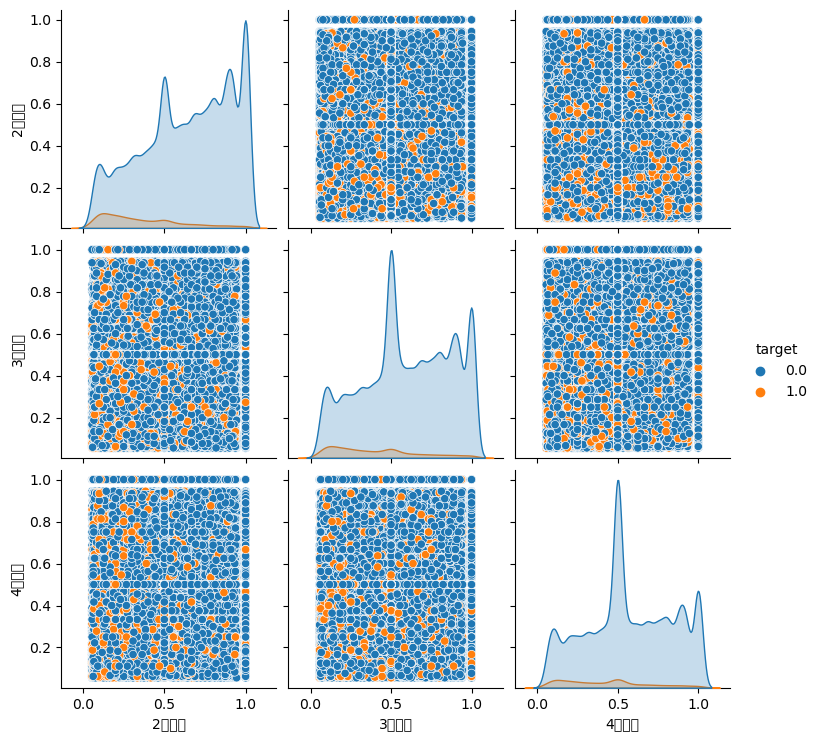

In [34]:
#いくつかの変数で変数同士の関係性を見てみる。
sns.pairplot(df_data,vars = ['2試合前','3試合前','4試合前'],hue="target")
plt.show()

C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from current font.
  fig.canvas.draw()
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from curre

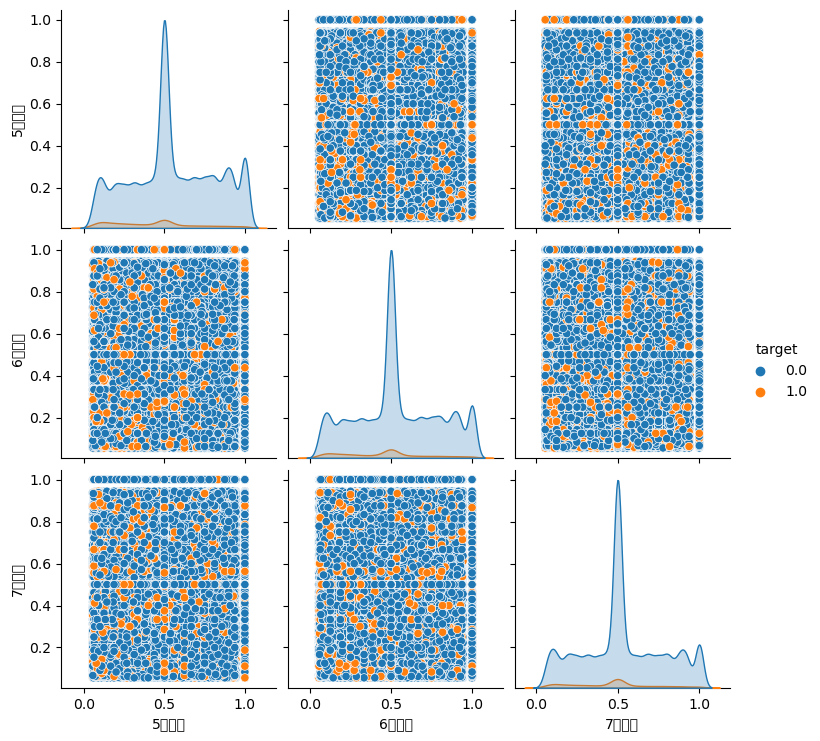

In [35]:
#いくつかの変数で変数同士の関係性を見てみる。
sns.pairplot(df_data,vars = ['5試合前','6試合前','7試合前'],hue="target")
plt.show()

C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from current font.
  fig.canvas.draw()
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from curre

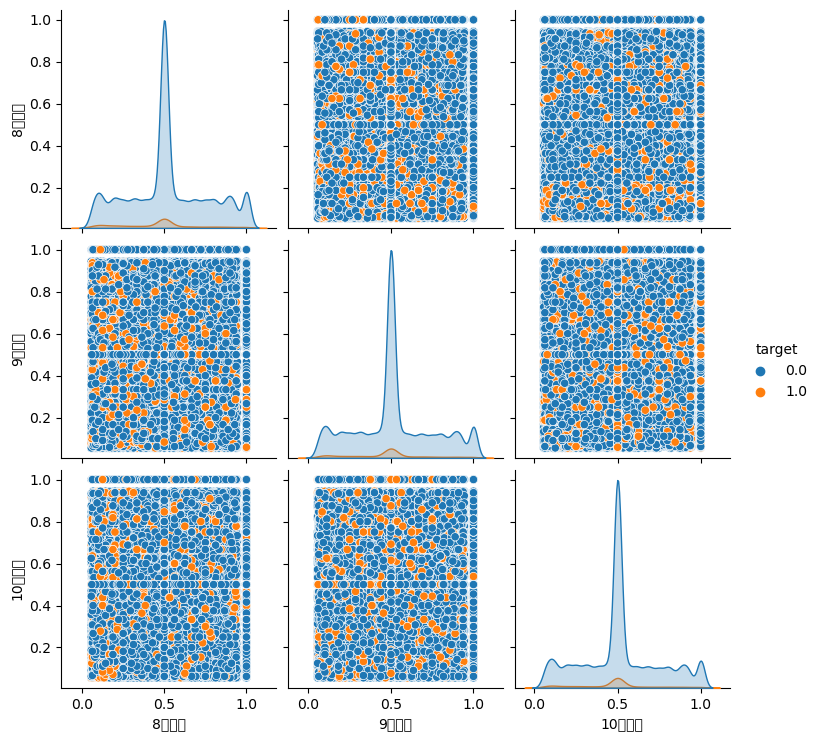

In [36]:
#いくつかの変数で変数同士の関係性を見てみる。
sns.pairplot(df_data,vars = ['8試合前','9試合前','10試合前'],hue="target")
plt.show()

In [82]:
#上図より、targetと相関があるのは2～6試合前の結果
#したがって、特徴量としては2～6試合前の結果を選定

In [83]:
x_train2 = x_train[:,0:6]
x_val2   = x_val[:,0:6]
x_test2  = x_test[:,0:6]

# 3.モデル作成

In [84]:
model = LogisticRegression(class_weight='balanced')  #'balanced'については参考欄を参照
params_grid = {
    'C': [1e-2, 1e-1, 1, 1e1, 1e2]
}
search = GridSearchCV(model, params_grid,cv=5)
search.fit(x_train2,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1, 10.0, 100.0]})

# 4.予測の評価
### 4.1.学習結果の表示

In [85]:
results = pd.DataFrame(search.cv_results_)
display(results)
bestparam = search.best_params_
print("best parameter is {}".format(bestparam))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029007,0.000633,0.001000,2.780415e-07,0.01,{'C': 0.01},0.717315,0.725139,0.718412,0.708248,0.724168,0.718656,0.006043,5
1,0.029406,0.001357,0.001401,4.902129e-04,0.1,{'C': 0.1},0.717534,0.725139,0.718485,0.708248,0.724241,0.718730,0.006047,4
2,0.028007,0.000633,0.001200,4.001856e-04,1,{'C': 1},0.717607,0.725139,0.718558,0.708248,0.724241,0.718759,0.006043,1
3,0.029607,0.001855,0.002001,7.776979e-07,10.0,{'C': 10.0},0.717607,0.725139,0.718558,0.708248,0.724241,0.718759,0.006043,1
4,0.028206,0.000400,0.001400,4.903102e-04,100.0,{'C': 100.0},0.717607,0.725139,0.718558,0.708248,0.724241,0.718759,0.006043,1


best parameter is {'C': 1}


### 4.2. AUCの計算

スレッショルド　：　[1.92219848 0.92219848 0.92217404 ... 0.05156513 0.05149632 0.05024599]


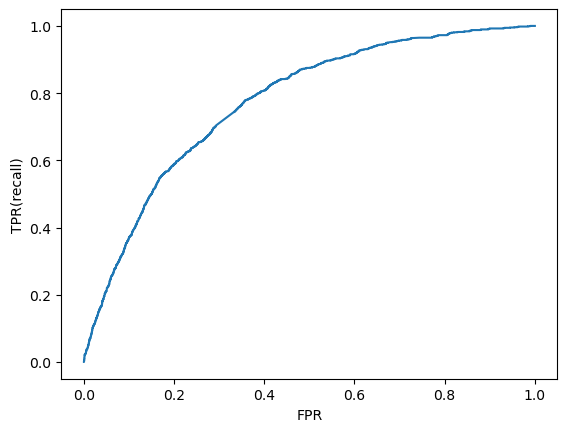

AUC = 0.7737686796104949


In [88]:
#fpr:偽陽性率（陰性のものの中で、陽性と予想したものの比率）
#tpr:真陽性率（陽性と予想したものの中で、陽性のものの比率）
fpr, tpr, thresholds = roc_curve(y_val, search.predict_proba(x_val2)[:,1])
print("スレッショルド　：　{}".format(thresholds))
#ROC Curveの描画
plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.show()
#テストデータのAUCの計算　←精度の評価として用いればよい
auc = roc_auc_score(y_val, search.predict_proba(x_val2)[:, 1])
print("AUC = {}".format(auc))

### 4.3. スレッショルドの決定

In [89]:
thresholds

array([1.92219848, 0.92219848, 0.92217404, ..., 0.05156513, 0.05149632,
       0.05024599])

In [92]:
best_score = 0.0
best_threshold = 0.0
for i in thresholds:
    each_y_pred_val = (search.predict_proba(x_val2)[:,1] > i) * 1
    if best_score < precision_score(y_true=y_val, y_pred=each_y_pred_val):
        best_threshold = i
        best_score = precision_score(y_true=y_val, y_pred=each_y_pred_val)
print('BEST THRESHOLD : ',best_threshold)
print('BEST PRECISION：',best_score)

C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hori\Documents\anaconda3\envs\keiba\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BEST THRESHOLD :  0.9011883707773375
BEST PRECISION： 0.5


### 4.4. precisionの計算

In [95]:
thre_y_pred_test = (search.predict_proba(x_test2)[:,1] > best_threshold) * 1
print('precision：', precision_score(y_true=y_test, y_pred=thre_y_pred_test))
print('recall：', recall_score(y_true=y_test, y_pred=thre_y_pred_test))
print('f1 score：', f1_score(y_true=y_test, y_pred=thre_y_pred_test))
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=thre_y_pred_test))

precision： 0.2923076923076923
recall： 0.014393939393939395
f1 score： 0.027436823104693142
confusion matrix = 
 [[20003    46]
 [ 1301    19]]


# 結論
### モデルの評価　：　AUC = 0.77
### 的中率　：　precision = 0.29
##### ランダムに予測するモデルでは的中率が17%であることを考慮すると、本モデルはまぁまぁ良いのかもしれない。

# 考察
#### グリッドサーチがほぼ機能していない件
　偏りがあるデータであるため、学習済みモデルも多数方向に偏っている。（モデルは多数側の０方向の予測に偏っている）そのため、閾値がデフォルトの場合、すべての予測が０となってしまい、ハイパーパラメータごとの差が生じなくなっている。閾値を変更する術は見いだせなかった。。。ただ、モデルのパラメータにclassweight='balanced'とすると、偏りも併せて学習してくれるようである。
 
 #### メトリックについて
モデルの評価はROCカーブの面積で評価すればよいと考えている。
また、スレッショルドは再現率(precision)が高くなるように設定すればよいのでは？

# 参考
### scikit-learnのロジスティック回帰
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression
### classweight="balanced"について
https://www.haya-programming.com/entry/2018/05/17/123000
### https://qiita.com/Hawaii/items/ee2a0687ca451fe213be
### https://qiita.com/ottantachinque/items/cd3be06c07cd92e353ed